In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../input/heart-attack-analysis-prediction-dataset/heart.csv")
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
data.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

<AxesSubplot:>

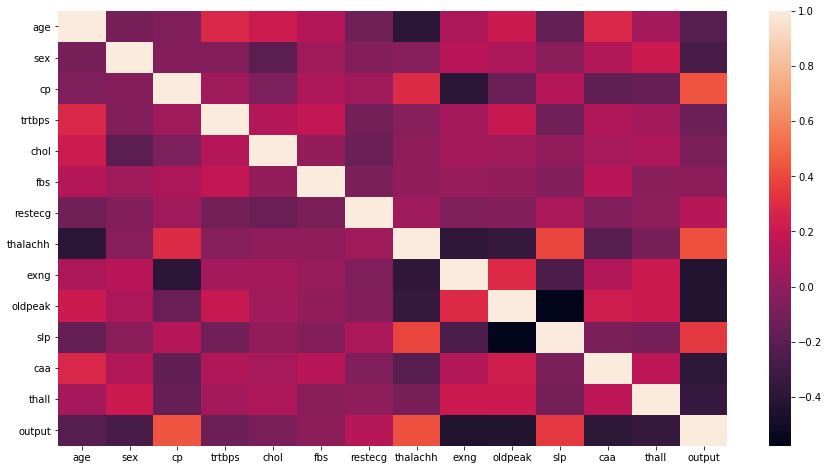

In [5]:
corr_data = data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(data=corr_data)

In [6]:
features = data.columns
features = features.drop("fbs")

Distplot of all the features are shown below:


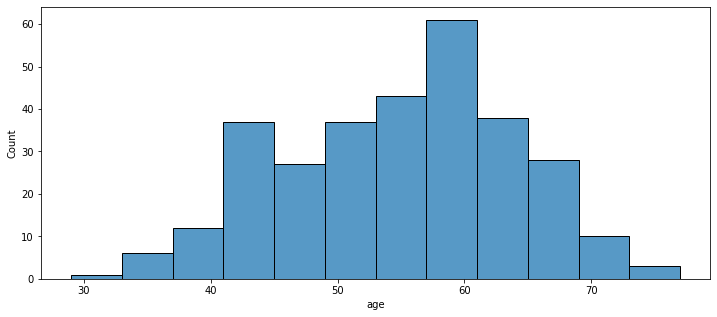

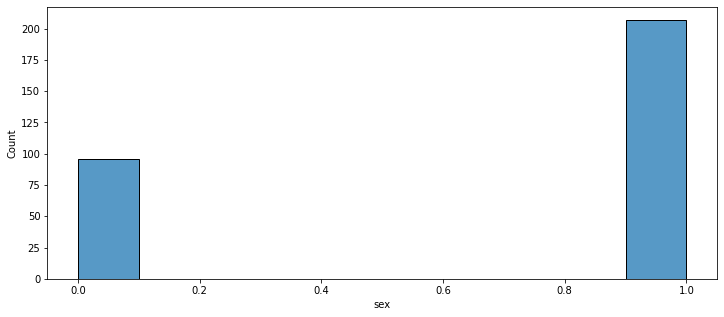

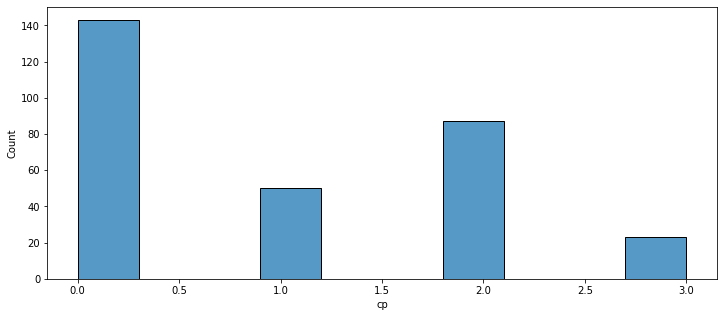

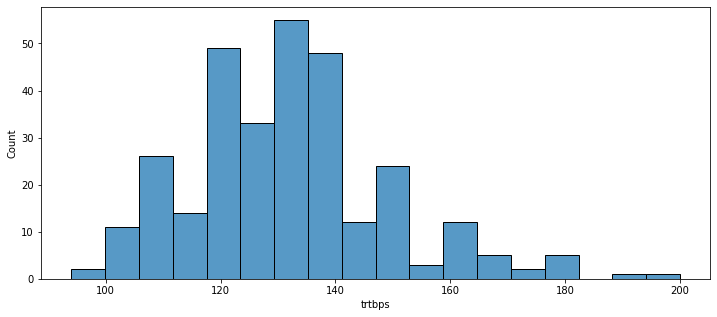

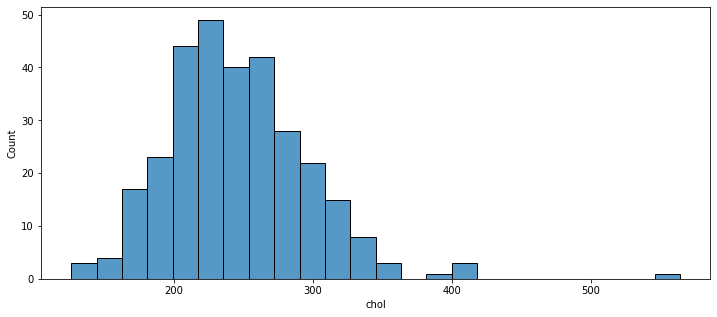

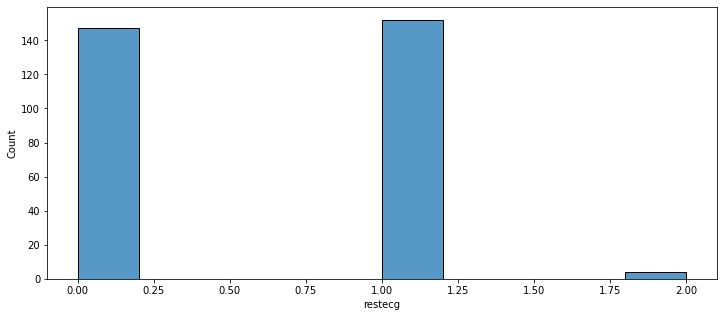

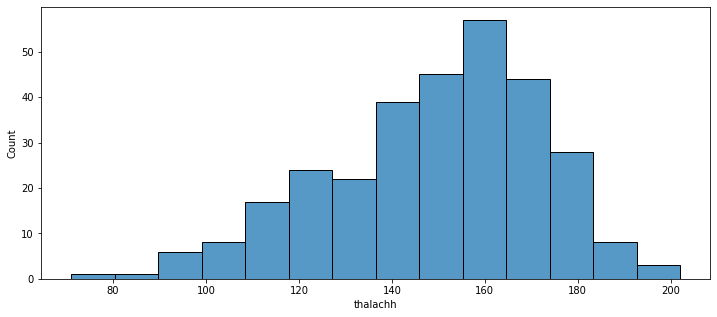

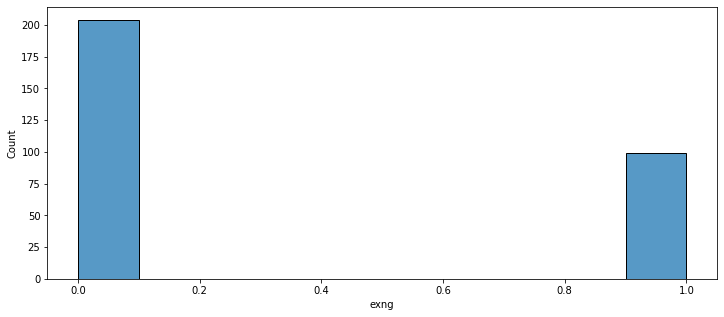

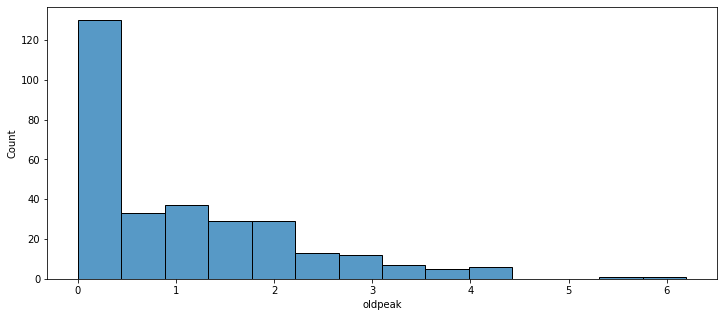

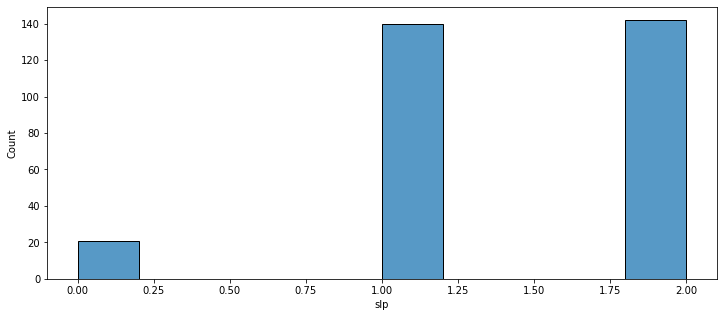

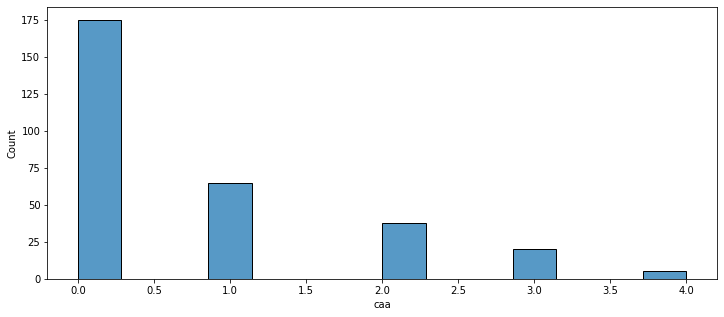

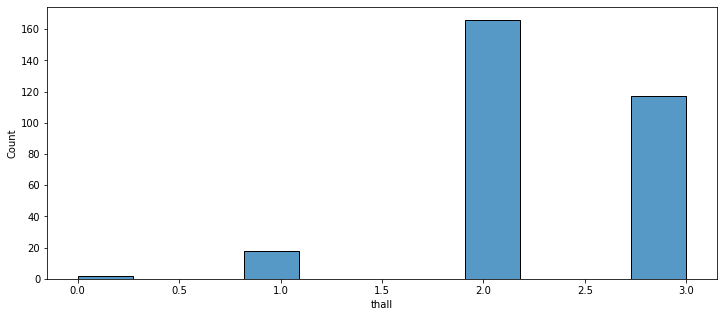

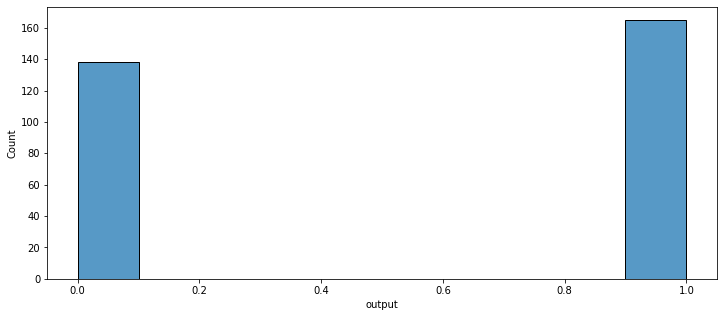

In [7]:
print("Distplot of all the features are shown below:")

for feature in features:
    plt.figure(figsize=(12,5))
    sns.histplot(data[feature])  

Countplot of all the features are shown below:


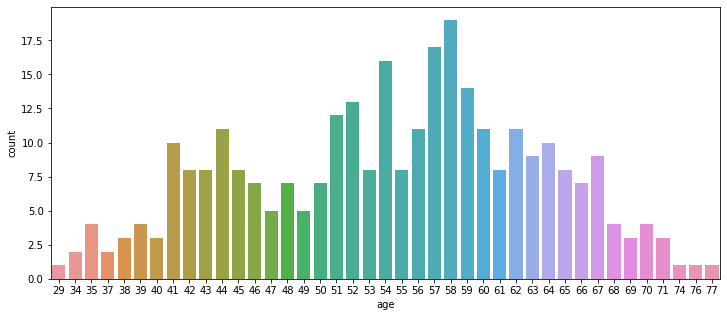

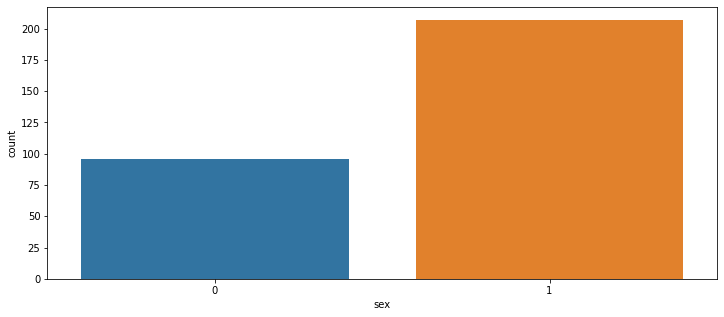

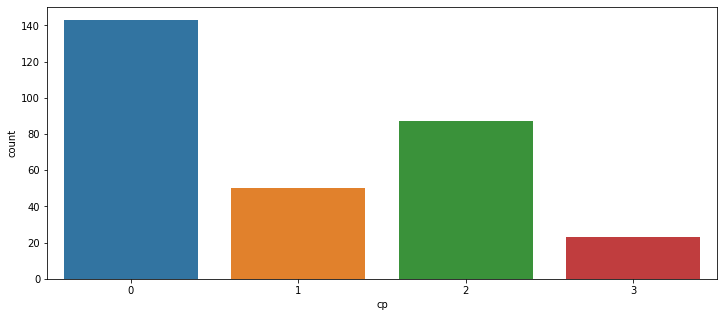

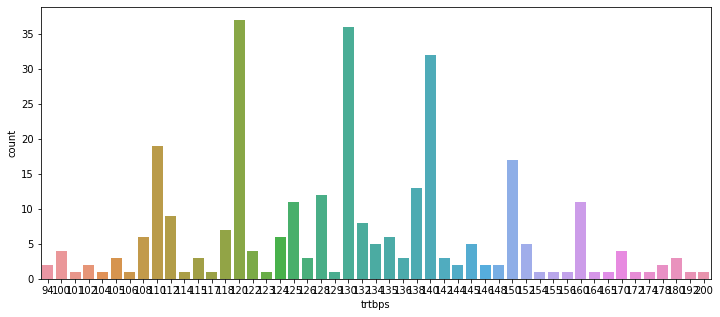

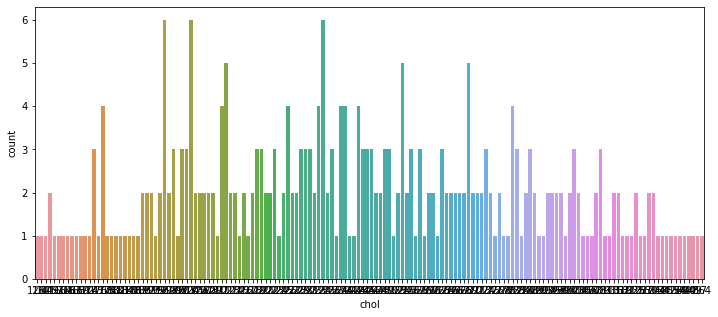

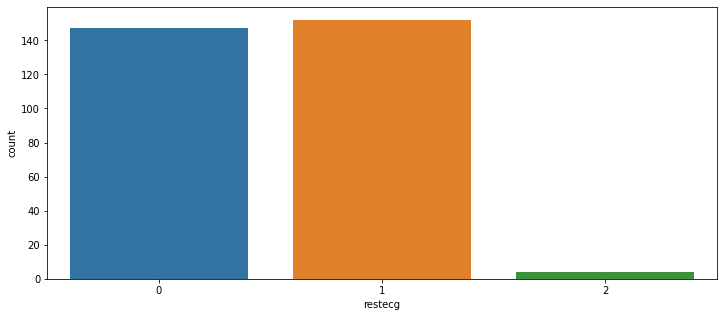

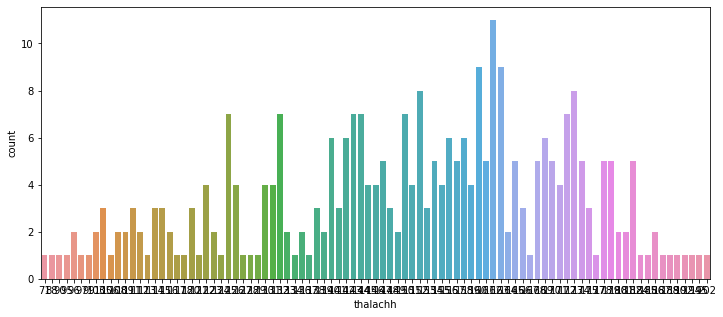

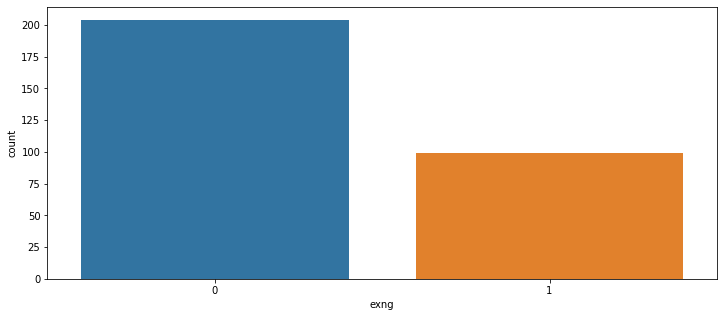

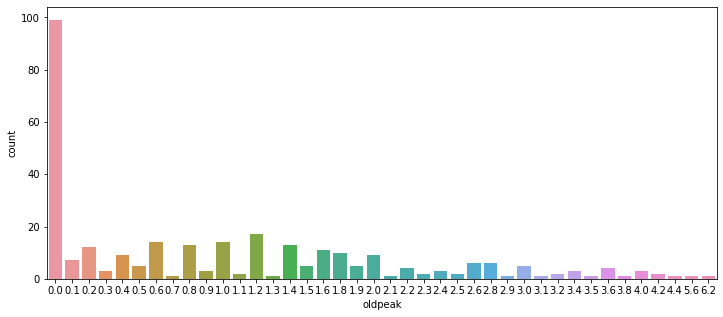

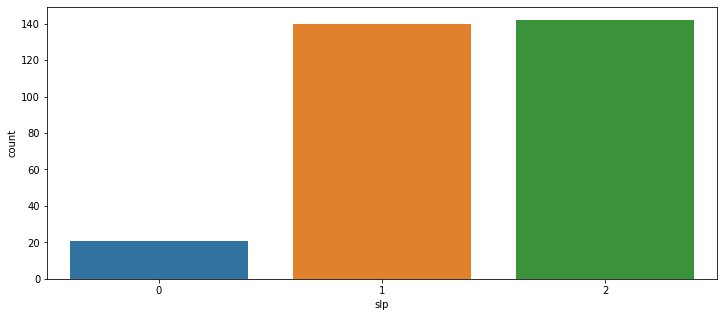

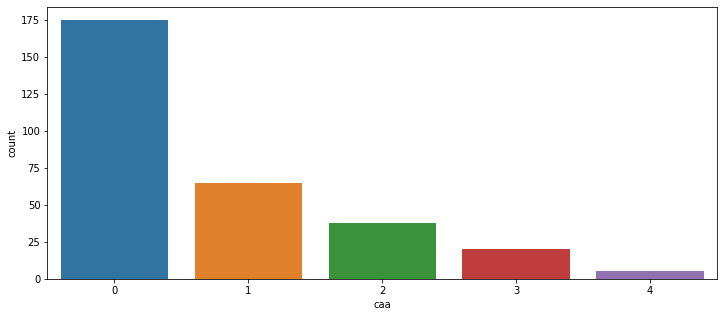

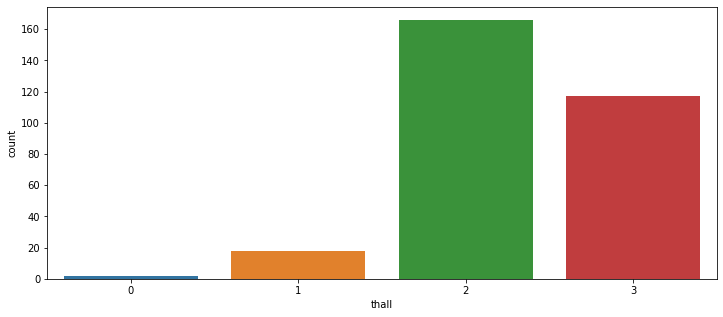

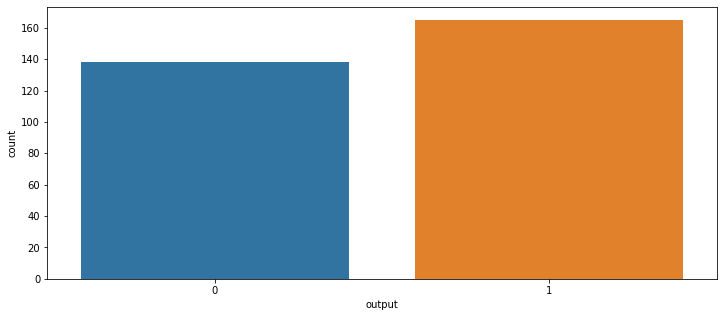

In [8]:
print("Countplot of all the features are shown below:")
    
for feature in features:
    plt.figure(figsize=(12,5))
    sns.countplot(x = data[feature])

Boxplot of all the features are shown below:


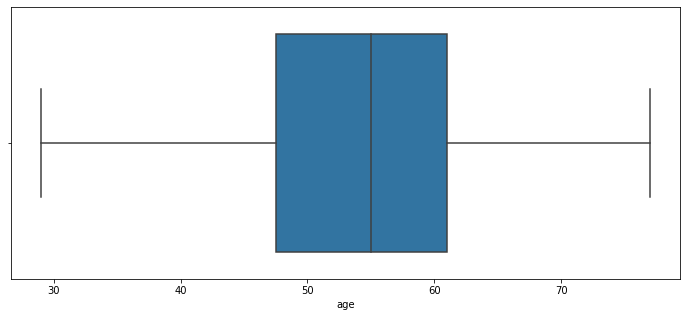

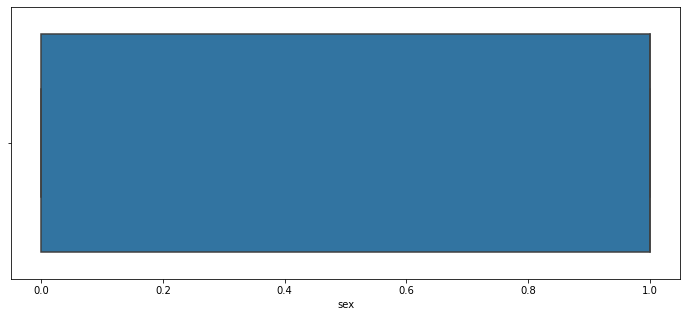

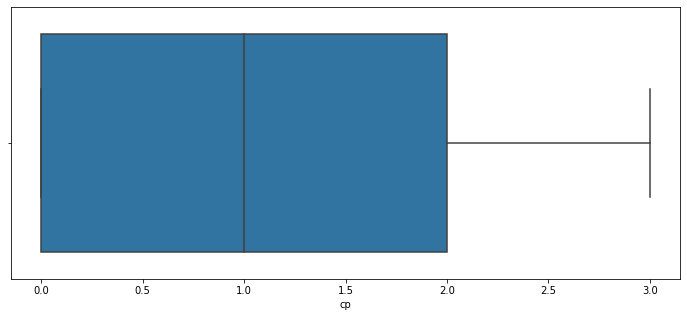

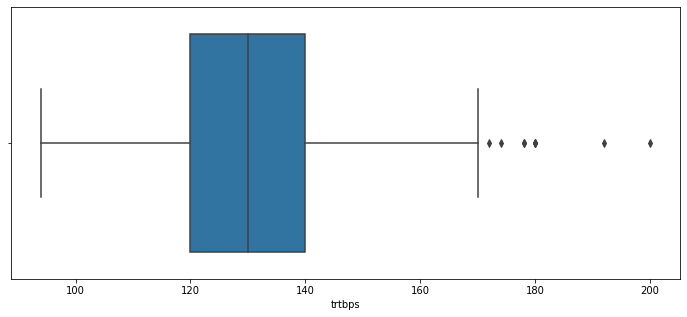

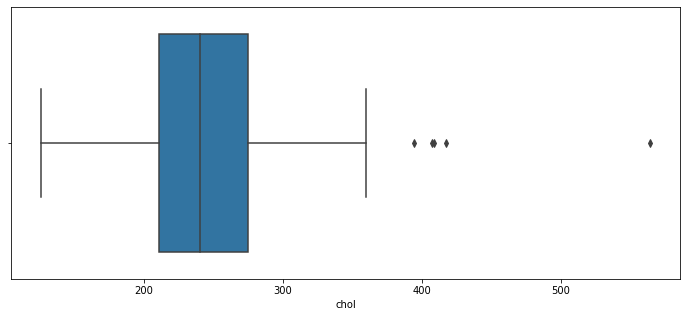

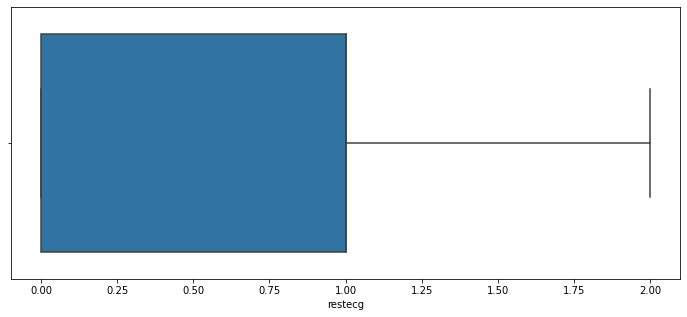

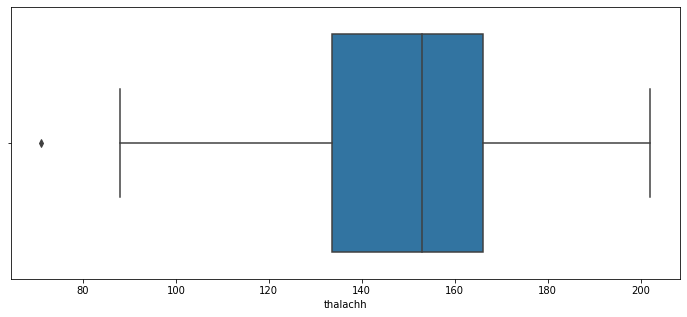

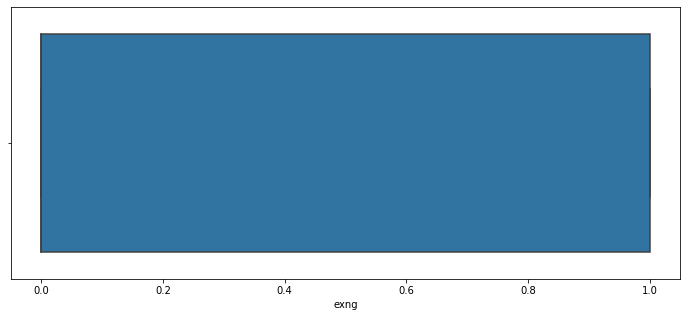

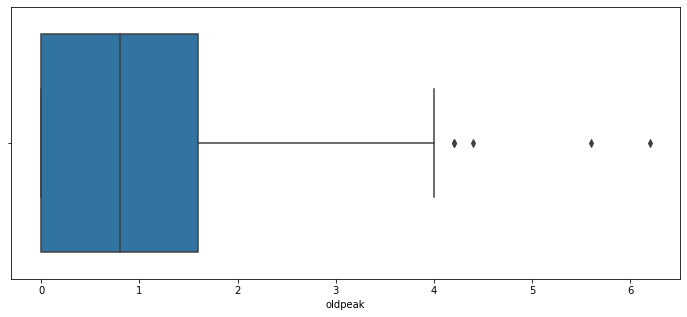

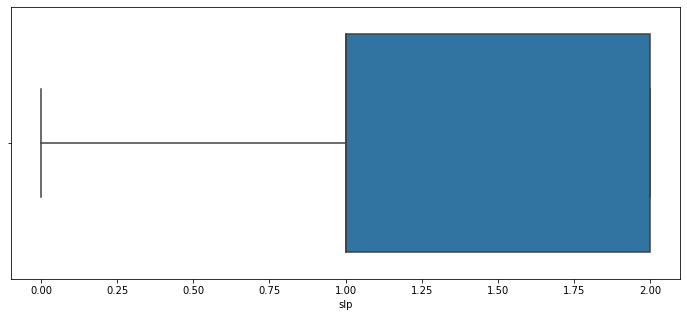

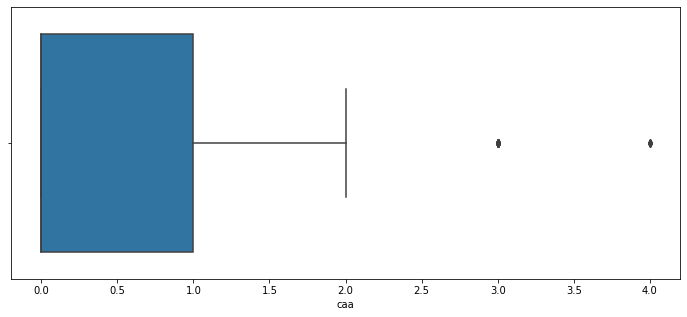

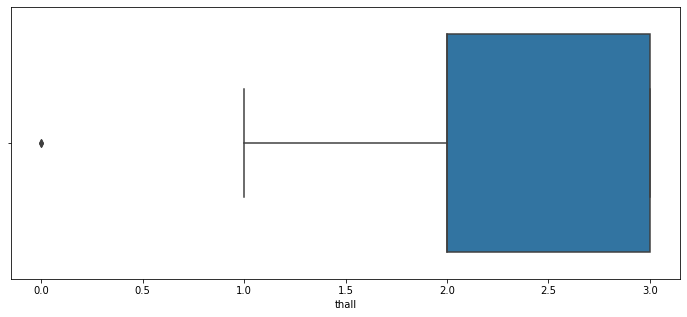

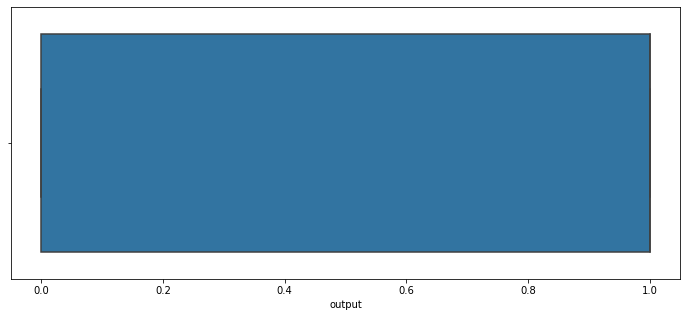

In [9]:
print("Boxplot of all the features are shown below:")
    
for feature in features:
    plt.figure(figsize=(12,5))
    sns.boxplot(x = data[feature])

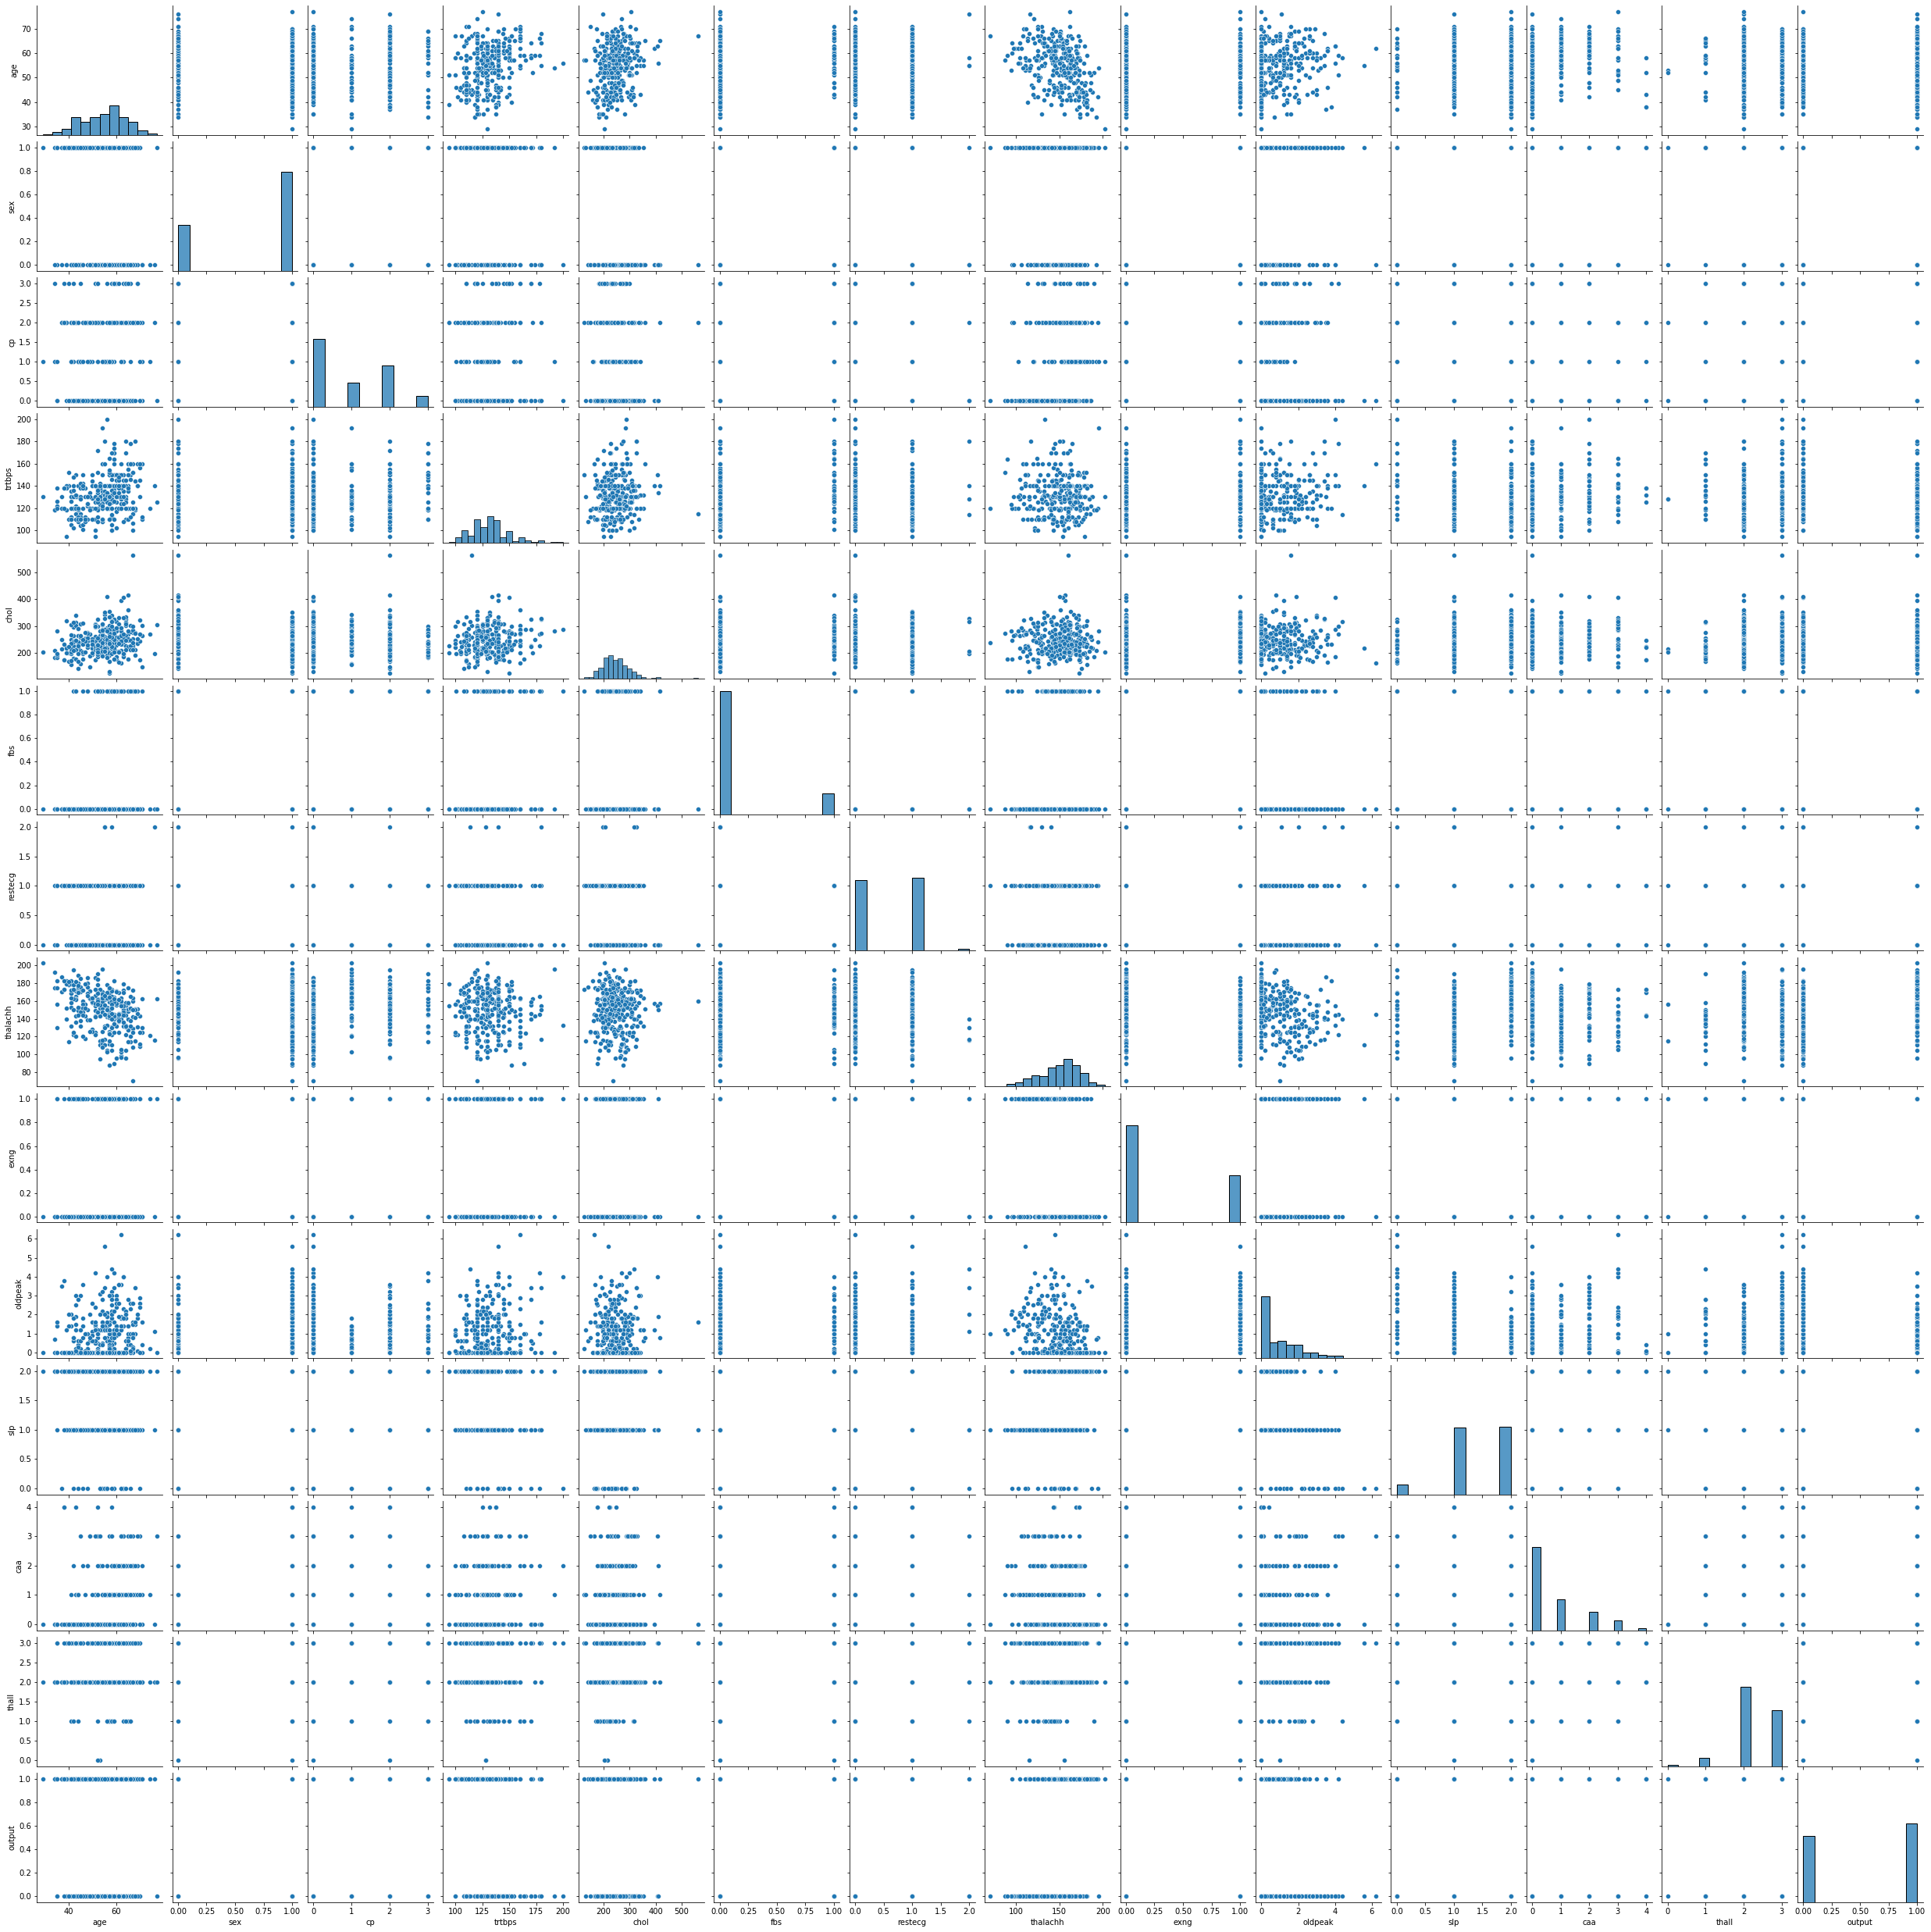

In [10]:
plt.figure(figsize=(12,5))
sns.pairplot(data)

Zoom in to get a better view.

# Model Building

Feature Engineering

In [11]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [12]:
numeric_columns = data.select_dtypes(exclude="O")

for feature in numeric_columns:
    q1 = data[feature].quantile(0.05)
    q3 = data[feature].quantile(0.95)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    med = np.mean(data[feature])
    for i in data[feature]:
        if i > Upper_tail or i < Lower_tail:
                data[feature] = data[feature].replace(i, med)

In [13]:
feature = data.columns
for col in feature:
    data["age_min"] = np.where(data["age"]<40,1,0)
    data["age_max"] = np.where(data["age"]>60,1,0)
    data["resting_BP_min"] = np.where(data["trtbps"]<120,1,0)
    data["resting_BP_max"] = np.where(data["trtbps"]>140,1,0)
    data["heart_rate_min"] = np.where(data["thalachh"]<120,1,0)
    data["heart_rate_max"] = np.where(data["thalachh"]>170,1,0)
    data["cholesterol_min"] = np.where(data["chol"]<200,1,0)
    data["cholesterol_max"] = np.where(data["chol"]>=300,1,0)

In [14]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,...,thall,output,age_min,age_max,resting_BP_min,resting_BP_max,heart_rate_min,heart_rate_max,cholesterol_min,cholesterol_max
0,63,1,3,145,233.0,1,0,150,0,2.3,...,1,1,0,1,0,1,0,0,0,0
1,37,1,2,130,250.0,0,1,187,0,3.5,...,2,1,1,0,0,0,0,1,0,0
2,41,0,1,130,204.0,0,0,172,0,1.4,...,2,1,0,0,0,0,0,1,0,0
3,56,1,1,120,236.0,0,1,178,0,0.8,...,2,1,0,0,0,0,0,1,0,0
4,57,0,0,120,354.0,0,1,163,1,0.6,...,2,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241.0,0,1,123,1,0.2,...,3,0,0,0,0,0,0,0,0,0
299,45,1,3,110,264.0,0,1,132,0,1.2,...,3,0,0,0,1,0,0,0,0,0
300,68,1,0,144,193.0,1,1,141,0,3.4,...,3,0,0,1,0,1,0,0,1,0
301,57,1,0,130,131.0,0,1,115,1,1.2,...,3,0,0,0,0,0,1,0,1,0


In [15]:
data.isnull().any()

age                False
sex                False
cp                 False
trtbps             False
chol               False
fbs                False
restecg            False
thalachh           False
exng               False
oldpeak            False
slp                False
caa                False
thall              False
output             False
age_min            False
age_max            False
resting_BP_min     False
resting_BP_max     False
heart_rate_min     False
heart_rate_max     False
cholesterol_min    False
cholesterol_max    False
dtype: bool

In [16]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [17]:
model1 = XGBClassifier()
model2 = LogisticRegression()
model3 = RandomForestClassifier()

x_train, x_test, y_train, y_test = train_test_split(data.drop(columns=["output"]), data["output"], test_size=0.3)

model1.fit(x_train, y_train)
model2.fit(x_train, y_train)
model3.fit(x_train, y_train)

score1 = model1.score(x_test, y_test)
score2 = model2.score(x_test, y_test)
score3 = model2.score(x_test, y_test)

print("accuracy of XGBClassifier is ", score1*100)
print("accuracy of LogisticRegression is ", score2*100)
print("accuracy of RandomForestClassifier is ", score3*100)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[15:15:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy of XGBClassifier is  83.51648351648352
accuracy of LogisticRegression is  84.61538461538461
accuracy of RandomForestClassifier is  84.61538461538461


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [18]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output', 'age_min',
       'age_max', 'resting_BP_min', 'resting_BP_max', 'heart_rate_min',
       'heart_rate_max', 'cholesterol_min', 'cholesterol_max'],
      dtype='object')

In [19]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model3, random_state=1).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

Weight,Feature
0.0220 ± 0.0368,cp
0.0220 ± 0.0393,caa
0.0132 ± 0.0323,sex
0.0110 ± 0.0393,thall
0.0022 ± 0.0164,slp
0.0022 ± 0.0164,restecg
0 ± 0.0000,age_min
-0.0000 ± 0.0241,exng
-0.0022 ± 0.0088,heart_rate_max
-0.0022 ± 0.0088,fbs


In [20]:
features = ['sex', 'cp', 'caa', 'output', "thall", "slp", "restecg", "age_min"]

data = data[features]

train_x, test_x, train_y, test_y = train_test_split(data.drop(columns=["output"]), data["output"], test_size=0.2)

test_model = RandomForestClassifier()

test_model.fit(train_x, train_y)

RandomForestClassifier()

In [21]:
params = {
    "max_depth"         : [3,4,5,6,7,8],
    "n_estimators"      : [50, 70, 80, 90, 100, 200, 400, 600],
    "random_state"      : [1,2,3,4,5,6],
    "n_jobs"            : [1,2,3,4,5]
    }

from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(test_model, param_distributions=params, n_iter=5, cv=5)

random_search.fit(train_x, train_y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [3, 4, 5, 6, 7, 8],
                                        'n_estimators': [50, 70, 80, 90, 100,
                                                         200, 400, 600],
                                        'n_jobs': [1, 2, 3, 4, 5],
                                        'random_state': [1, 2, 3, 4, 5, 6]})

In [22]:
random_search.best_estimator_

RandomForestClassifier(max_depth=4, n_jobs=3, random_state=2)

In [23]:
random_search.best_params_

{'random_state': 2, 'n_jobs': 3, 'n_estimators': 100, 'max_depth': 4}

In [24]:
final_model = RandomForestClassifier(max_depth=4, n_jobs=3, random_state=2)

final_model.fit(train_x, train_y)

final_score = final_model.score(test_x, test_y)

print("Accuracy of our model is ", final_score*100)

Accuracy of our model is  88.52459016393442
